In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
import string
import seaborn as sb

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from matplotlib import pyplot
%matplotlib inline

nltk.download('stopwords')
nltk.download('wordnet')

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
pd.set_option('display.max_colwidth', 200)

col_list = ['text', 'label']
data = pd.read_csv("Train.csv", usecols=col_list)
data.columns = ['body_text', 'label']

data.head(10)

# Remove Punctuation, Tokenize & Remove Stopwords

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([word for word in tokens if word not in stopwords])
    return text

data['body_text_nostopwords'] = data['body_text'].apply(lambda x: clean_text(x))
data.head(10)


# Stem Text

In [ ]:
def stemming(tokenized_text):
    tokens = re.split('\W+', tokenized_text)
    text = " ".join([ps.stem(word) for word in tokens])
    return text


data['body_text_stemmed'] = data['body_text_nostopwords'].apply(lambda x: stemming(x))
data.head(50)

# Lemmatize Text

def lemmatizing(tokenized_text):
    tokens = re.split('\W+', tokenized_text)
    text = " ".join([wn.lemmatize(word) for word in tokens])
    return text

data['body_lemmatized'] = data['body_text_nostopwords'].apply(lambda x: lemmatizing(x))
data.head(50)

# Count Punctuation

In [5]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100



data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['body_punct'] = data['body_text'].apply(lambda x: count_punct(x))

data.head(50)

,body_text,label,body_text_nostopwords,body_text_stemmed,body_len,body_punct
0,I feel that it was better I dieAm happy,Depression,feel better dieam happy,feel better dieam happi,31,0.0
1,Why do I get hallucinations?,Drugs,get hallucinations,get hallucin,24,4.2
2,I am stresseed due to lack of financial support in school,Depression,stresseed due lack financial support school,stresse due lack financi support school,47,0.0
3,Why is life important?,Suicide,life important,life import,19,5.3
4,How could I be helped to go through the depression?,Depression,could helped go depression,could help go depress,42,2.4
5,What are the effects of depression to ones health,Depression,effects depression ones health,effect depress one health,41,0.0
6,Why is everything so hard to deal with in this life,Depression,everything hard deal life,everyth hard deal life,41,0.0
7,I feel emotionally overwhelmed,Depression,feel emotionally overwhelmed,feel emot overwhelm,27,0.0
8,How to manage taking alcohol?,Alcohol,manage taking alcohol,manag take alcohol,25,4.0
9,Is heaven open for us who smoke bhang?,Drugs,heaven open us smoke bhang,heaven open us smoke bhang,31,3.2


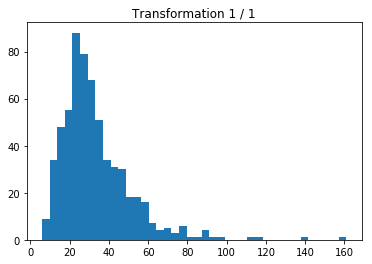

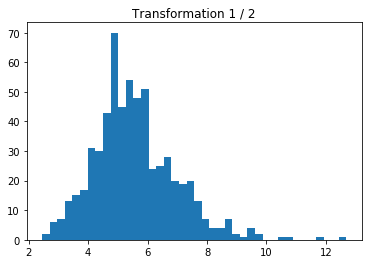

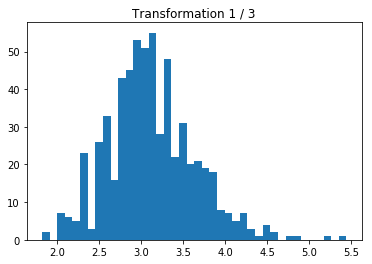

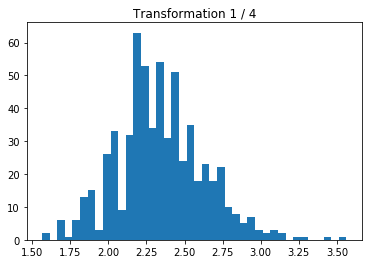

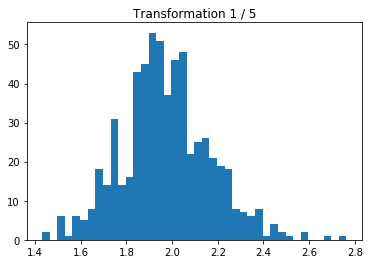

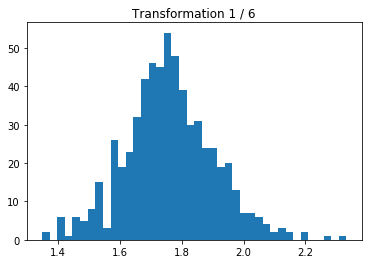

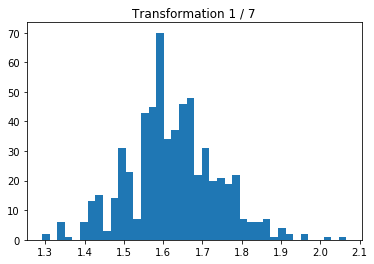

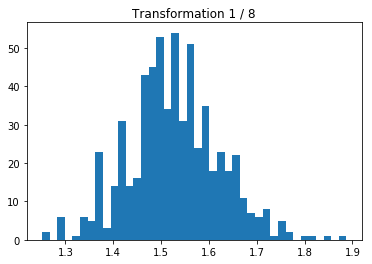

In [6]:
for i in [1, 2, 3, 4, 5, 6, 7, 8]:
    pyplot.hist((data['body_len']) ** (1/i), bins=40)
    pyplot.title('Transformation 1 / {}'.format(str(i)))
    pyplot.show()


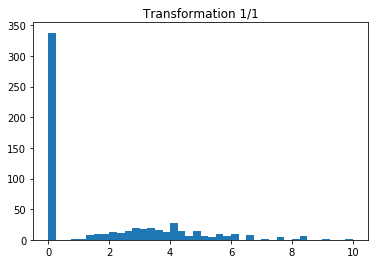

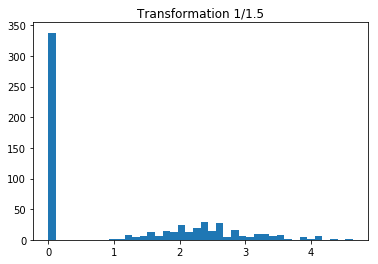

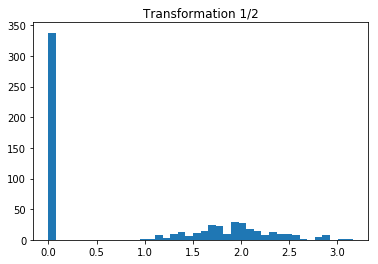

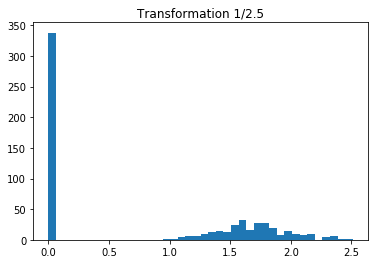

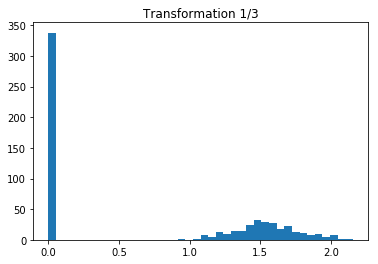

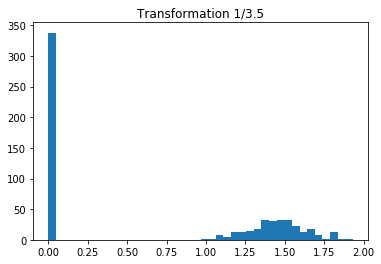

In [7]:
for i in [1, 1.5, 2, 2.5, 3, 3.5]:
    pyplot.hist((data['body_punct']) ** (1/i), bins=40)
    pyplot.title('Transformation 1/{}'.format(str(i)))
    pyplot.show()
                

In [8]:
def transform_punct(punct):
    t_punct = punct ** (1/1.5)
    return t_punct

def transform_len(len):
    t_length = len ** (1/6)
    return t_length

data['body_len_transformed'] = data['body_len'].apply(lambda x: transform_len(x))
data['body_punct_transformed'] = data['body_punct'].apply(lambda x: transform_punct(x))
data.head(50)

,body_text,label,body_text_nostopwords,body_text_stemmed,body_len,body_punct,body_len_transformed,body_punct_transformed
0,I feel that it was better I dieAm happy,Depression,feel better dieam happy,feel better dieam happi,31,0.0,1.772394,0.000000
1,Why do I get hallucinations?,Drugs,get hallucinations,get hallucin,24,4.2,1.698381,2.603152
2,I am stresseed due to lack of financial support in school,Depression,stresseed due lack financial support school,stresse due lack financi support school,47,0.0,1.899691,0.000000
3,Why is life important?,Suicide,life important,life import,19,5.3,1.633524,3.039839
4,How could I be helped to go through the depression?,Depression,could helped go depression,could help go depress,42,2.4,1.864411,1.792562
5,What are the effects of depression to ones health,Depression,effects depression ones health,effect depress one health,41,0.0,1.856938,0.000000
6,Why is everything so hard to deal with in this life,Depression,everything hard deal life,everyth hard deal life,41,0.0,1.856938,0.000000
7,I feel emotionally overwhelmed,Depression,feel emotionally overwhelmed,feel emot overwhelm,27,0.0,1.732051,0.000000
8,How to manage taking alcohol?,Alcohol,manage taking alcohol,manag take alcohol,25,4.0,1.709976,2.519842
9,Is heaven open for us who smoke bhang?,Drugs,heaven open us smoke bhang,heaven open us smoke bhang,31,3.2,1.772394,2.171534


# Encode Label

In [9]:
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'])

data.head(50)
    

,body_text,label,body_text_nostopwords,body_text_stemmed,body_len,body_punct,body_len_transformed,body_punct_transformed,label_encoded
0,I feel that it was better I dieAm happy,Depression,feel better dieam happy,feel better dieam happi,31,0.0,1.772394,0.000000,1
1,Why do I get hallucinations?,Drugs,get hallucinations,get hallucin,24,4.2,1.698381,2.603152,2
2,I am stresseed due to lack of financial support in school,Depression,stresseed due lack financial support school,stresse due lack financi support school,47,0.0,1.899691,0.000000,1
3,Why is life important?,Suicide,life important,life import,19,5.3,1.633524,3.039839,3
4,How could I be helped to go through the depression?,Depression,could helped go depression,could help go depress,42,2.4,1.864411,1.792562,1
5,What are the effects of depression to ones health,Depression,effects depression ones health,effect depress one health,41,0.0,1.856938,0.000000,1
6,Why is everything so hard to deal with in this life,Depression,everything hard deal life,everyth hard deal life,41,0.0,1.856938,0.000000,1
7,I feel emotionally overwhelmed,Depression,feel emotionally overwhelmed,feel emot overwhelm,27,0.0,1.732051,0.000000,1
8,How to manage taking alcohol?,Alcohol,manage taking alcohol,manag take alcohol,25,4.0,1.709976,2.519842,0
9,Is heaven open for us who smoke bhang?,Drugs,heaven open us smoke bhang,heaven open us smoke bhang,31,3.2,1.772394,2.171534,2


# Evaluate Created Features

# - Body Len Feature

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' ins

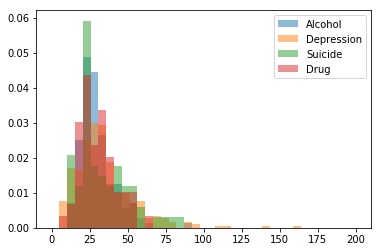

In [10]:
bins  = np.linspace(0, 200, 40)
pyplot.hist(data[data['label'] == 'Alcohol']['body_len'], bins=bins, alpha=0.5, normed=True, label='Alcohol')
pyplot.hist(data[data['label'] == 'Depression']['body_len'], bins=bins, alpha=0.5, normed=True, label='Depression')
pyplot.hist(data[data['label'] == 'Suicide']['body_len'], bins=bins, alpha=0.5, normed=True, label='Suicide')
pyplot.hist(data[data['label'] == 'Drugs']['body_len'], bins=bins, alpha=0.5, normed=True, label='Drug')
pyplot.legend(loc='upper right')
pyplot.show()

# - Body Punct Feature

bins = np.linspace(0, 15, 20)
pyplot.hist(data[data['label'] == 'Alcohol']['body_punct'], bins=bins, normed=True, label='Alcohol')
pyplot.hist(data[data['label'] == 'Depression']['body_punct'], bins=bins, normed=True, label='Depression')
pyplot.hist(data[data['label'] == 'Suicide']['body_punct'], bins=bins, normed=True, label='Suicide')
pyplot.hist(data[data['label'] == 'Drug']['body_punct'], bins=bins, normed=True, label='Drug')
pyplot.legend(loc='upper right')
pyplot.show()

# Create Features

In [11]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text_stemmed'])
X_tfidf_features = pd.concat([data['body_len_transformed'], data['body_punct_transformed'], pd.DataFrame(X_tfidf.toarray())], axis =1)
                       
X_tfidf_features.head(10)

,body_len_transformed,body_punct_transformed,0,1,2,3,4,5,6,7,...,628,629,630,631,632,633,634,635,636,637
0,1.772394,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.698381,2.603152,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.899691,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.633524,3.039839,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.864411,1.792562,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.856938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.856938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.732051,0.000000,0.631813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.709976,2.519842,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.772394,2.171534,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploring Parameters With Gridsearch

rf = RandomForestClassifier()
param = {'n_estimators':[10, 150, 300, 400], 'max_depth':[30, 60, 90, 120, None]}
gs = GridSearchCV(rf, param, cv=5, n_jobs=1)
gs_fit = gs.fit(X_tfidf_features, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

# Feature Importance

In [23]:
rf = RandomForestClassifier()
y = data['label']
X_train, x_test, Y_train, y_test = train_test_split(X_tfidf_features, y, test_size=0.3)
rf.fit(X_train, Y_train)
#pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Random Forest Classifier

In [27]:

rf = RandomForestClassifier(n_estimators=500, max_depth=60, n_jobs=-1)
rf_model = rf.fit(X_train, Y_train)

y_pred = rf_model.predict(x_test)


print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred, average="micro"))
print('Precision Score', precision_score(y_test, y_pred, average="micro"))

my_tags = ['Alchohol', 'Drugs', 'Suicide', 'Depression']
print(classification_report(y_test, y_pred,target_names=my_tags))

Accuracy Score:  0.8756756756756757
Recall Score:  0.8756756756756757
Precision Score 0.8756756756756757
              precision    recall  f1-score   support

    Alchohol       0.93      0.90      0.92        42
       Drugs       0.85      0.98      0.91       102
     Suicide       0.94      0.80      0.86        20
  Depression       0.89      0.38      0.53        21

   micro avg       0.88      0.88      0.88       185
   macro avg       0.90      0.77      0.81       185
weighted avg       0.88      0.88      0.86       185



# Naive Bayes Classifier

In [12]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, Y_train)

predictions = naive_bayes.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, predictions))
print('Recall Score: ', recall_score(y_test, predictions, average='micro'))
print('Precision Score', precision_score(y_test, predictions, average='micro'))



Accuracy Score:  0.7351351351351352
Recall Score:  0.7351351351351352
Precision Score 0.7351351351351352


# Confusion Matrix

Text(91.68, 0.5, 'predicted label')

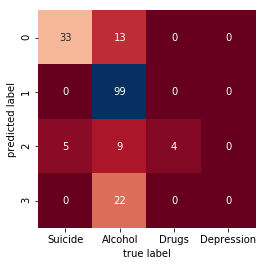

In [13]:
cm = confusion_matrix(y_test, predictions)
sb.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, xticklabels=['Suicide', 'Alcohol', 'Drugs', 'Depression'])
pyplot.xlabel('true label')
pyplot.ylabel('predicted label')


# Final Testing

In [20]:
df = pd.read_csv('Test.csv')
dh = df[rf_model.predict(tfidf_vect.transform(['How to overcome bad feelings and emotions']))]
dh.head()

KeyError: '[1] not in index'

X_train, x_test, Y_test, y_test = train_test_split(X_tfidf_features, data['label_encoded'], test_size=0.3)
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, Y_train)
    y_pred = rf_model.predict(y_test)
    precision, recall, fscore, support = score(y_test, y_pred, average='micro')
    print('Est: {} / Depth {} ------------- Precision: {} Recall: {} Accuracy: {}'.format(
    n_est, depth, round(precision, 3), round(recall, 3), round((y_pred==y_test).sum() / len(y_pred), 3))
    )